In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.spatial.transform import Rotation as R

In [2]:
pelvis = pd.read_csv('David-30-pokus02/Xsens_DOT_2_D422CD006474_20250409_104322.csv', skiprows= 7,  sep=',')
right = pd.read_csv('David-30-pokus02/Xsens_DOT_4_D422CD006380_20250409_104322.csv', skiprows= 7,  sep=',')
left = pd.read_csv('David-30-pokus02/Xsens_DOT_3_D422CD006379_20250409_104322.csv', skiprows= 7,  sep=',')

In [3]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
right['real_ticks'] = right['SampleTimeFine'] - right['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
right['time_s'] = right['real_ticks'] * 1e-6

# Convert seconds to milliseconds
right['time_ms'] = right['time_s'] * 1000
#  show the actual intervals between samples
right['delta_ms'] = right['time_ms'].diff()

In [4]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
left['real_ticks'] = left['SampleTimeFine'] - left['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
left['time_s'] = left['real_ticks'] * 1e-6

# Convert seconds to milliseconds
left['time_ms'] = left['time_s'] * 1000
#  show the actual intervals between samples
left['delta_ms'] = left['time_ms'].diff()

In [5]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
pelvis['real_ticks'] = pelvis['SampleTimeFine'] - pelvis['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
pelvis['time_s'] = pelvis['real_ticks'] * 1e-6

# Convert seconds to milliseconds
pelvis['time_ms'] = pelvis['time_s'] * 1000
#  show the actual intervals between samples
pelvis['delta_ms'] = pelvis['time_ms'].diff()

In [6]:
right[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,0.483491,5941.785500
std,6.600405,3437.707639
min,-81.180511,0.000000
25%,0.799165,2970.892750
50%,0.890899,5941.785500
75%,0.950103,8912.678250
max,51.900600,11883.571000


In [7]:
left[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,-1.039240,5941.785500
std,5.178559,3437.707639
min,-82.401886,0.000000
25%,-0.555332,2970.892750
50%,-0.410330,5941.785500
75%,-0.346807,8912.678250
max,47.471092,11883.571000


In [8]:
pelvis[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,1.349678,5941.785500
std,2.524019,3437.707639
min,-9.293372,0.000000
25%,0.853924,2970.892750
50%,0.943704,5941.785500
75%,1.234306,8912.678250
max,41.643772,11883.571000


<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='time_ms'>

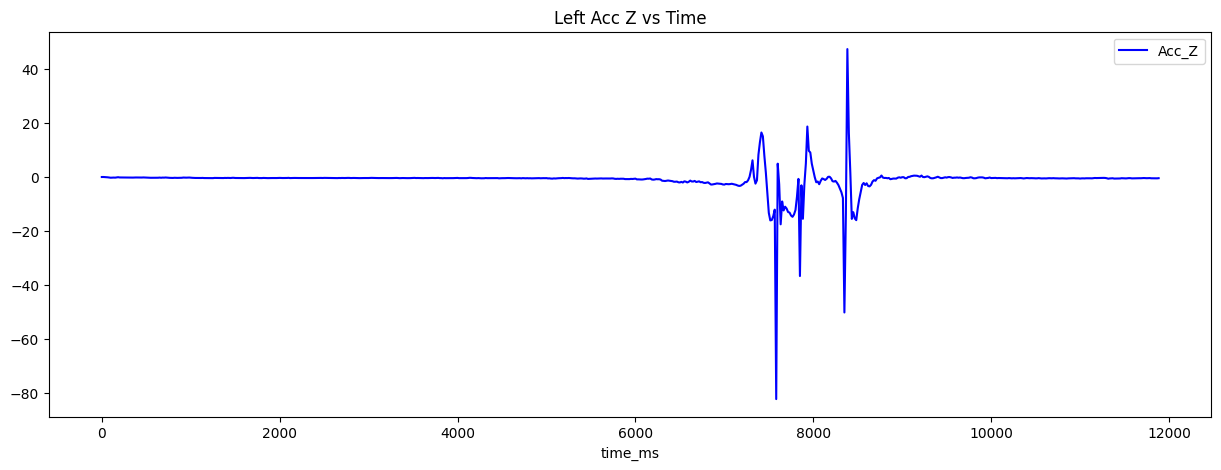

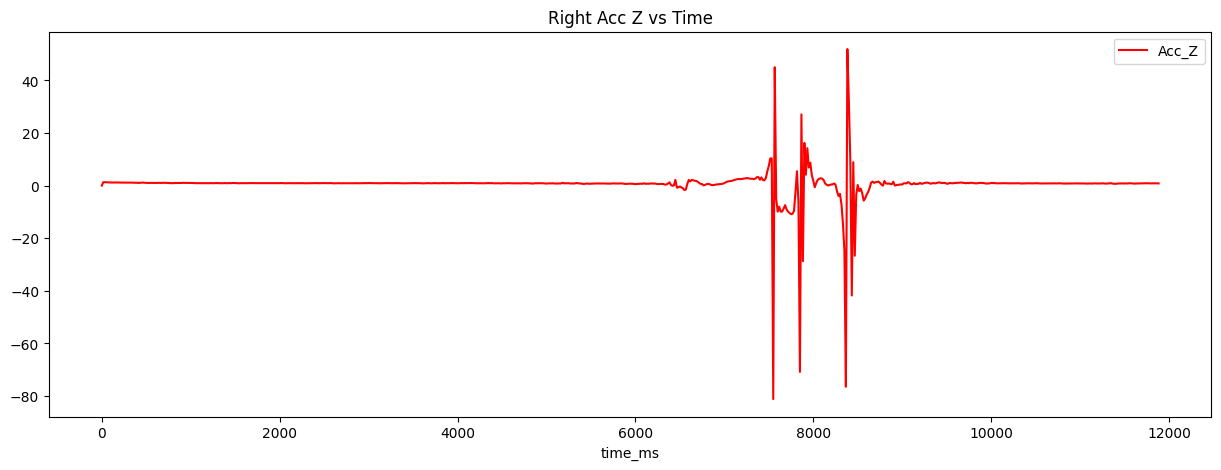

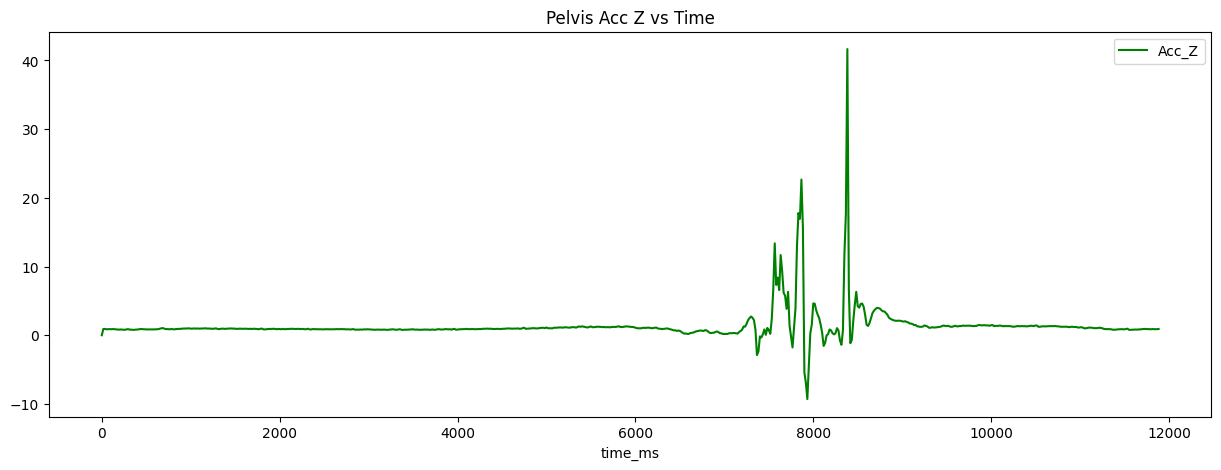

In [9]:
# visualize the data and find the connection between the accelerometer  and times 
left.plot(x='time_ms', y='Acc_Z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='time_ms', y='Acc_Z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='time_ms', y='Acc_Z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')